In [58]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [59]:
def load_dataset(): 
    sales = pd.read_excel("sales.xlsx", header=1)
    view_rate = pd.read_excel("view_rate.xlsx",header =1, index_col= 0)
    return sales, view_rate

sales = load_dataset()[0]
view_rate = load_dataset()[1]

In [60]:
sales

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


In [61]:
view_rate.head()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,0.005,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


In [62]:
# 무형 지우기
sales.drop(sales[sales["상품군"]=="무형"].index, inplace=True)

In [63]:
# 결측된 노출분 채우기
for i,row in sales.iterrows():
    val = row["노출(분)"]
    if i == 0 :
        continue
        
    if  np.isnan(val):
        if sales.loc[i,"방송일시"] == sales.loc[i-1,"방송일시"]:
            sales.loc[i,"노출(분)"] = sales.loc[i-1,"노출(분)"]
        else : 
            continue
            
sales.isnull().sum()
sales

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0


In [64]:
# 판매단가 > 취급액 이면 취급액 = 0 

def custom(price, total):
    if price > total:
        return 0
    
    else:
        return total

# sales["취급액"] = sales.apply(lambda x: 0 if x['판매단가'] > x['취급액'] else x['취급액'])
# sales["취급액"] = sales.apply(lambda x : custom(x["판매단가"], x["취급액"]))

def new_total(row):
    if row["판매단가"] > row["취급액"]:
        return 0
    else:
        row["취급액"]
type(sales)
# sales['취급액'] = sales.apply(new_total, axis=1)

pandas.core.frame.DataFrame

In [155]:
# 마지막 열의 값이 mena일까? 
test_lst= np.round(np.mean(view_rate.iloc[:,:-1].values,axis=1),3)==view_rate.iloc[:,-1].values
print(test_lst.all())
for i in np.argwhere(test_lst ==False):
    print("{}번째 열들의 평균은 ".format(i))
    print("마지막 열 직전까지의 값 {}".format(np.mean(view_rate.iloc[i,:-1].values)))
    print("실제값 : {}\n".format(view_rate.iloc[i,-1].values))

False
[93]번째 열들의 평균은 
마지막 열 직전까지의 값 0.002495890410958904
실제값 : [0.003]

[120]번째 열들의 평균은 
마지막 열 직전까지의 값 0.0015013698630136987
실제값 : [0.001]

[628]번째 열들의 평균은 
마지막 열 직전까지의 값 0.004512328767123287
실제값 : [0.004]

[652]번째 열들의 평균은 
마지막 열 직전까지의 값 0.004506849315068493
실제값 : [0.004]

[664]번째 열들의 평균은 
마지막 열 직전까지의 값 0.004506849315068493
실제값 : [0.004]

[745]번째 열들의 평균은 
마지막 열 직전까지의 값 0.006504109589041095
실제값 : [0.006]

[785]번째 열들의 평균은 
마지막 열 직전까지의 값 0.006504109589041096
실제값 : [0.006]

[837]번째 열들의 평균은 
마지막 열 직전까지의 값 0.006504109589041096
실제값 : [0.006]

[962]번째 열들의 평균은 
마지막 열 직전까지의 값 0.006504109589041096
실제값 : [0.006]

[988]번째 열들의 평균은 
마지막 열 직전까지의 값 0.004498630136986301
실제값 : [0.005]

[1206]번째 열들의 평균은 
마지막 열 직전까지의 값 0.0034958904109589043
실제값 : [0.004]



해당 위치에서 mean 값이랑 값이 맞지 않습니다.

In [156]:
# 마지막 열의 값이 mena일까? 
test_lst= np.round(np.mean(view_rate.iloc[:-1,:].values,axis=0),3)==view_rate.iloc[-1,:].values
print(test_lst.all())
for i in np.argwhere(test_lst ==False):
    print("{}번째 열들의 평균은 ".format(i))
    print("마지막 열 직전까지의 값 {}".format(np.mean(view_rate.iloc[:-1,i].values)))
    print("실제값 : {}\n".format(view_rate.iloc[-1,i].values[0]))

False
[50]번째 열들의 평균은 
마지막 열 직전까지의 값 0.0044777777777777784
실제값 : 0.005

[57]번째 열들의 평균은 
마지막 열 직전까지의 값 0.003486111111111111
실제값 : 0.004

[110]번째 열들의 평균은 
마지막 열 직전까지의 값 0.0024874999999999997
실제값 : 0.003

[184]번째 열들의 평균은 
마지막 열 직전까지의 값 0.003491666666666667
실제값 : 0.004

[204]번째 열들의 평균은 
마지막 열 직전까지의 값 0.00851875
실제값 : 0.008

[230]번째 열들의 평균은 
마지막 열 직전까지의 값 0.009490972222222224
실제값 : 0.01

[263]번째 열들의 평균은 
마지막 열 직전까지의 값 0.005501388888888889
실제값 : 0.005

[310]번째 열들의 평균은 
마지막 열 직전까지의 값 0.004525694444444444
실제값 : 0.004

[353]번째 열들의 평균은 
마지막 열 직전까지의 값 0.014594444444444441
실제값 : 0.014



---
## 의문점 쓰는 공간 

1. view_rate의 마지막 행과 열은 각각 무엇을 의미할까요???
> 마지막 열 : 93, 120, 628, 652, 745, 785, 837, 962, 988, 1206 위치에 있는 것들을 제외하고는 평균의 소수점 넷째자리에서 반올림한 값입니다. 
> <br>위의 예외들은 올린것도 있고...버린것도있고... 뒤죽박죽 
> <br>마지막 행 : 위와 마찬가지 ;;; 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x149f972d0>,
      dtype=object)

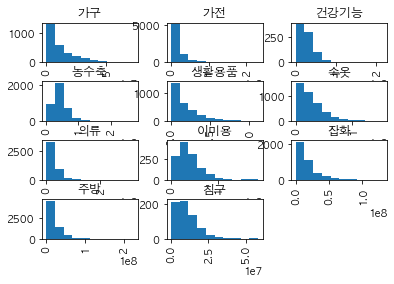

In [165]:
sales.취급액.hist(by=sales.상품군)

In [166]:
# df = sales.groupby('상품군')['취급액'].agg('count')
sales.상품군.value_counts()

주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
건강기능     790
침구       669
Name: 상품군, dtype: int64

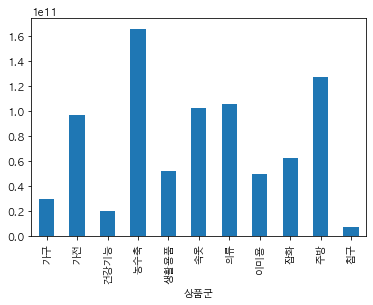

In [167]:
sales.groupby(['상품군'])['취급액'].sum().plot.bar()

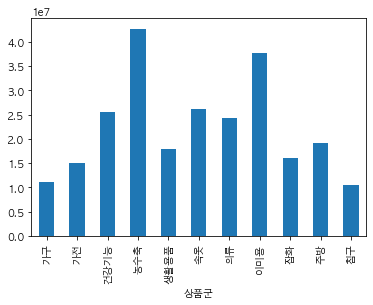

In [168]:
sales.groupby(['상품군'])['취급액'].mean().plot.bar()

In [169]:
sales['month'] = pd.DatetimeIndex(sales['방송일시']).month
sales['day'] = pd.DatetimeIndex(sales['방송일시']).day
sales['hour'] = pd.DatetimeIndex(sales['방송일시']).hour
sales['minute'] = pd.DatetimeIndex(sales['방송일시']).minute

In [170]:
sales.groupby(['month', '상품군']).sum()['취급액'].unstack()

상품군,가구,가전,건강기능,농수축,생활용품,속옷,의류,이미용,잡화,주방,침구
month,,,,,,,,,,,
1,NaN,7.443582e+09,1.208088e+09,2.053628e+10,2.561073e+09,1.049655e+10,8.508143e+09,3.456610e+09,1.887322e+09,1.282966e+10,NaN
2,2.734551e+09,9.637182e+09,1.136406e+09,1.201721e+10,3.123247e+09,6.631456e+09,6.320186e+09,2.982287e+09,3.810956e+09,1.119485e+10,NaN
3,3.160337e+09,9.185087e+09,1.463361e+09,7.583698e+09,5.324272e+09,1.018290e+10,1.113156e+10,1.935054e+09,5.304263e+09,9.366818e+09,NaN
4,3.149639e+09,1.029206e+10,7.976930e+08,6.923465e+09,2.575729e+09,9.043216e+09,9.564433e+09,2.300892e+09,3.531384e+09,1.238186e+10,2.325390e+08
5,2.793887e+09,1.254701e+10,1.106787e+09,9.772354e+09,1.936612e+09,1.110494e+10,1.132289e+10,2.287170e+09,6.343167e+09,8.772368e+09,9.268420e+08
6,2.777056e+09,6.147901e+09,2.747047e+09,9.212766e+09,1.681650e+09,1.387210e+10,1.079362e+10,2.183696e+09,4.185127e+09,1.040034e+10,2.343745e+09
7,2.411248e+09,7.773842e+09,1.917653e+09,1.442284e+10,2.279325e+09,9.103370e+09,7.997335e+09,3.179406e+09,6.892725e+09,1.099400e+10,2.054010e+09
8,2.576131e+09,7.102425e+09,9.936400e+08,2.098538e+10,3.919849e+09,8.444648e+09,7.519910e+09,2.071920e+09,5.809821e+09,9.461386e+09,1.385900e+08
9,3.026932e+09,5.534816e+09,1.875243e+09,1.873170e+10,4.126727e+09,3.541833e+09,7.032600e+09,4.824076e+09,8.777813e+09,9.867296e+09,1.373200e+08


KeyError: 'month'

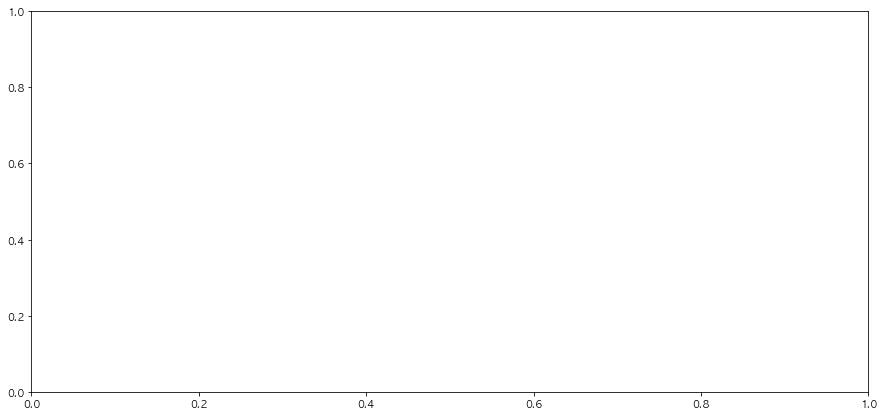

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
sales.groupby(['month', '상품군']).sum()['취급액'].unstack().plot(ax=ax)

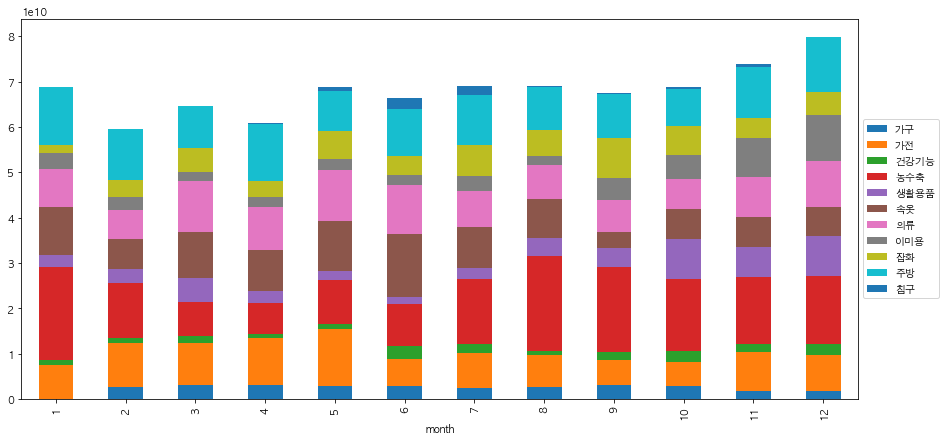

In [172]:
fig, ax = plt.subplots(figsize=(15,7))
sales.groupby(['month', '상품군']).sum()['취급액'].unstack().plot(kind='bar',stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

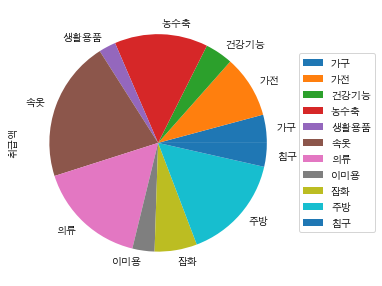

In [207]:
# 6월 데이터 카테고리별 판매량
june = sales['month'] == 6
june_sales = sales[june]
fig, ax = plt.subplots(figsize=(10,5))
june_sales.groupby(['상품군']).sum()['취급액'].plot(kind='pie', ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

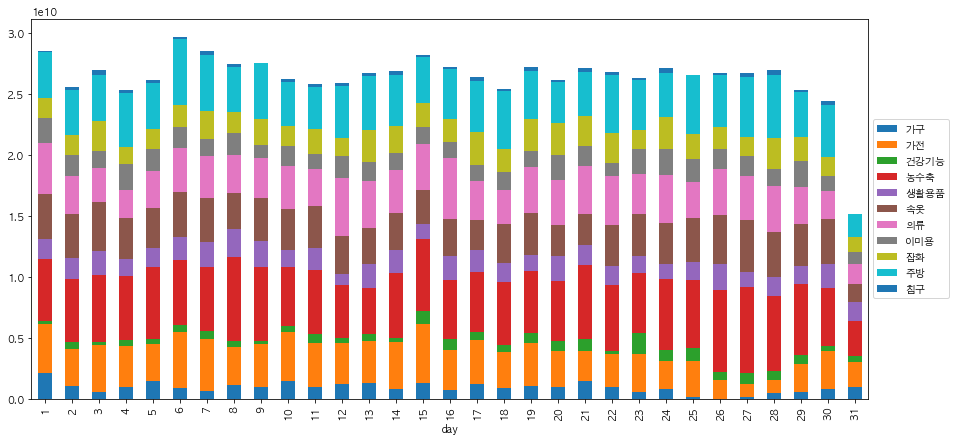

In [173]:
fig, ax = plt.subplots(figsize=(15,7))
sales.groupby(['day', '상품군']).sum()['취급액'].unstack().plot(kind='bar',stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:


fig, ax = plt.subplots(figsize=(15,10))
sales.groupby(['hour', '상품군']).sum()['취급액'].unstack().plot(kind='bar',stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [190]:
# fig, ax = plt.subplots(figsize=(15,10))
# sales.groupby(['노출(분)']).sum()['취급액']
# sales['노출(분)'] = sales['노출(분)'].round()
sales['노출(분)'].sort_values().unique()
# sales.groupby(['노출(분)','상품군']).sum()['취급액'].unstack().plot(kind='bar',stacked=True, ax=ax)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

array([ 2.46666667,  2.81666667,  3.        ,  3.16666667,  3.28333333,
        3.45      ,  5.16666667,  5.33333333,  5.46666667,  6.63333333,
        6.66666667,  6.68333333,  6.85      ,  7.26666667,  8.85      ,
        9.7       , 10.        , 10.96666667, 11.03333333, 11.33333333,
       12.        , 12.13333333, 12.5       , 12.53333333, 12.66666667,
       12.9       , 13.        , 13.16666667, 13.33333333, 13.5       ,
       14.35      , 14.66666667, 14.7       , 14.83333333, 14.98333333,
       15.        , 15.01666667, 15.03333333, 15.06666667, 15.08333333,
       15.16666667, 15.2       , 15.25      , 15.33333333, 15.36666667,
       15.5       , 15.66666667, 15.83333333, 15.85      , 15.86666667,
       16.        , 16.01666667, 16.03333333, 16.05      , 16.08333333,
       16.1       , 16.16666667, 16.2       , 16.33333333, 16.35      ,
       16.51666667, 16.66666667, 16.68333333, 16.7       , 16.83333333,
       16.85      , 16.86666667, 16.96666667, 17.08333333, 17.1 

In [193]:
sales['노출(분)'].value_counts().sort_index()

2.466667        1
2.816667        1
3.000000        2
3.166667        1
3.283333        1
             ... 
27.083333       1
29.983333       1
30.000000    1931
30.100000     693
40.000000       2
Name: 노출(분), Length: 102, dtype: int64

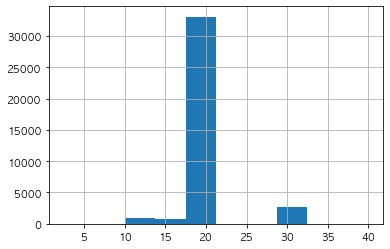

In [194]:
sales['노출(분)'].hist()

In [185]:
sales.groupby(['month','상품군']).size()

month  상품군 
1      가전      570
       건강기능     63
       농수축     458
       생활용품     83
       속옷      389
              ... 
12     속옷      282
       의류      330
       이미용     213
       잡화      295
       주방      491
Length: 127, dtype: int64

In [ ]:
# 상품명 여성/남성 분석
# 